In [15]:
# API 
# website link: https://coinmarketcap.com
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c2efa588-d6b1-4e5d-a1f2-4f88d25599cb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-08-06T12:28:26.601Z', 'error_code': 0, 'error_message': None, 'elapsed': 75, 'credit_count': 25, 'notice': None, 'total_count': 9800}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9660, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# setting no limit to see the data
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [93]:
# converting to dataframe
df = pd.json_normalize(data['data'])
df["timestamp"] = pd.to_datetime('now')
df.head()

id      name symbol      slug  num_market_pairs  \
0     1   Bitcoin    BTC   bitcoin              9660   
1  1027  Ethereum    ETH  ethereum              5916   
2   825    Tether   USDT    tether             37462   
3  3408  USD Coin   USDC  usd-coin              5170   
4  1839       BNB    BNB       bnb              1050   

                 date_added  \
0  2013-04-28T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2018-10-08T00:00:00.000Z   
4  2017-07-25T00:00:00.000Z   

                                                tags      max_supply  \
0  [mineable, pow, sha-256, store-of-value, state...  21000000.00000   
1  [mineable, pow, smart-contracts, ethereum-ecos...             NaN   
2  [payments, stablecoin, asset-backed-stablecoin...             NaN   
3  [medium-of-exchange, stablecoin, asset-backed-...             NaN   
4  [marketplace, centralized-exchange, payments, ... 200000000.00000   

   circulating_supply      total_supply  platform  cmc_rank  \
0      19113887.00000    19113887.00000       NaN         1   
1     121853085.06150   121853085.06150       NaN         2   
2   66476525454.64799 69158976389.07431       NaN         3   
3   54311515866.69498 54311515866.69498       NaN         4   
4     161337261.09000   161337261.09000       NaN         5   

   self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                               NaN                       NaN        NaN   
1                               NaN                       NaN        NaN   
2                               NaN                       NaN        NaN   
3                               NaN                       NaN        NaN   
4                               NaN                       NaN        NaN   

               last_updated  quote.USD.price  quote.USD.volume_24h  \
0  2022-08-06T12:25:00.000Z      23182.23898     23690349494.06610   
1  2022-08-06T12:25:00.000Z       1713.83751     16731539948.88399   
2  2022-08-06T12:25:00.000Z          1.00013     44257125327.91005   
3  2022-08-06T12:25:00.000Z          0.99993      5372288044.22609   
4  2022-08-06T12:25:00.000Z        314.29463      1298761249.23583   

   quote.USD.volume_change_24h  quote.USD.percent_change_1h  \
0                    -11.64360                     -0.03405   
1                      3.60340                     -0.34075   
2                     -6.64220                     -0.00073   
3                     -9.22250                      0.00053   
4                    -27.64030                     -0.35556   

   quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
0                      -0.79248                     -3.55986   
1                      -0.00447                      0.39633   
2                      -0.00329                     -0.01043   
3                       0.00632                      0.01532   
4                      -1.24870                      8.59319   

   quote.USD.percent_change_30d  quote.USD.percent_change_60d  \
0                      13.51998                     -21.35959   
1                      44.96896                      -2.06673   
2                       0.08944                       0.07887   
3                      -0.00417                      -0.02129   
4                      32.67808                      13.69837   

   quote.USD.percent_change_90d  quote.USD.market_cap  \
0                     -33.24549    443102696327.84552   
1                     -33.28370    208836388165.44266   
2                       0.01381     66484887415.23574   
3                      -0.00495     54307924009.50731   
4                     -12.00156     50707434058.99321   

   quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                        40.40420                  486827018642.77002   
1                        19.04270                  208836388165.44000   
2                         6.06240                   69167675770.25999   
3

In [37]:
# creating function for API pull automation
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c2efa588-d6b1-4e5d-a1f2-4f88d25599cb',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df2 = pd.json_normalize(data['data'])
    df2["timestamp"] = pd.to_datetime('now')
    df = df.append(df2)
    #if not os.path.isfile(r'path/API.csv'):
        #df.to_csv(r'path/API.csv', header='column_names')
    #else:
        #df.to_csv(r'path/API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'path/API.csv')

In [38]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

/Users/gokul/Desktop/api_project/env/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/40/pw27z_8n5hnd2trjpns8pkbw0000gn/T/ipykernel_4174/1640431989.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


/Users/gokul/Desktop/api_project/env/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/40/pw27z_8n5hnd2trjpns8pkbw0000gn/T/ipykernel_4174/1640431989.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


/Users/gokul/Desktop/api_project/env/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/40/pw27z_8n5hnd2trjpns8pkbw0000gn/T/ipykernel_4174/1640431989.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


/Users/gokul/Desktop/api_project/env/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/40/pw27z_8n5hnd2trjpns8pkbw0000gn/T/ipykernel_4174/1640431989.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


/Users/gokul/Desktop/api_project/env/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/var/folders/40/pw27z_8n5hnd2trjpns8pkbw0000gn/T/ipykernel_4174/1640431989.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [39]:
len(df)

105

In [86]:
#df

In [44]:
# transforming data
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [87]:
#df

In [48]:
# Now let's look at the coin trends over time

df3 = df.groupby('name')[['quote.USD.percent_change_1h','quote.USD.percent_change_24h',
                          'quote.USD.percent_change_7d','quote.USD.percent_change_30d',
                          'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                     
Avalanche                        0.10543                       5.35293   
BNB                             -0.21998                      -0.15761   
Binance USD                      0.03764                       0.01646   
Bitcoin                          0.04138                       0.17521   
Cardano                         -0.12317                       1.10773   
Dai                              0.01121                       0.00965   
Dogecoin                         0.08416                       1.15475   
Ethereum                        -0.33295                       1.36827   
Polkadot                        -0.16302                       3.26301   
Polygon                         -0.35003                       0.64710   
Solana                          -0.09236                      -0.06244   
Tether                           0.00007                       0.00152   
USD Coin                         0.01341                       0.00392   
Uniswap                         -0.79863                      -0.52242   
XRP                             -0.03390                      -0.10091   

             quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                     
Avalanche                        3.47724                      32.81254   
BNB                              8.02822                      33.27227   
Binance USD                      0.12098                       0.07807   
Bitcoin                         -4.14645                      13.55637   
Cardano                         -2.76151                      11.38164   
Dai                             -0.03642                      -0.08711   
Dogecoin                        -2.69804                       1.17486   
Ethereum                         0.02480                      44.85274   
Polkadot                         0.26545                      24.29978   
Polygon                         -2.59254                      75.19652   
Solana                          -5.76916                       9.23074   
Tether                          -0.01337                       0.08868   
USD Coin                         0.01239                      -0.03706   
Uniswap                          2.20736                      62.12140   
XRP                              0.34139                      13.72089   

             quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                     
Avalanche                         8.35839                     -52.17205  
BNB                              12.77503                     -11.62315  
Binance USD                      -0.10354                       0.04383  
Bitcoin                         -21.49255                     -33.07664  
Cardano                         -12.02942                     -30.44101  
Dai                              -0.05015                       0.05757  
Dogecoin                        -12.20166                     -44.43615  
Ethereum                         -2.26146                     -33.08281  
Polkadot                         -3.61816                     -35.59718  
Polygon                          56.42358                      -7.34749  
Solana                            5.76592                     -48.38191  
Tether                            0.07971                       0.02190  
USD Coin                         -0.01295                      -0.01575  
Uniswap                          77.00588                      24.66461  
XRP                              -3.94371                     -34.61276

In [49]:
df4 = df3.stack()
df4

name                                     
Avalanche    quote.USD.percent_change_1h      0.10543
             quote.USD.percent_change_24h     5.35293
             quote.USD.percent_change_7d      3.47724
             quote.USD.percent_change_30d    32.81254
             quote.USD.percent_change_60d     8.35839
             quote.USD.percent_change_90d   -52.17205
BNB          quote.USD.percent_change_1h     -0.21998
             quote.USD.percent_change_24h    -0.15761
             quote.USD.percent_change_7d      8.02822
             quote.USD.percent_change_30d    33.27227
             quote.USD.percent_change_60d    12.77503
             quote.USD.percent_change_90d   -11.62315
Binance USD  quote.USD.percent_change_1h      0.03764
             quote.USD.percent_change_24h     0.01646
             quote.USD.percent_change_7d      0.12098
             quote.USD.percent_change_30d     0.07807
             quote.USD.percent_change_60d    -0.10354
             quote.USD.percent_change_90

In [88]:
df5 = df4.to_frame(name='values')
#df5

In [89]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe.
count_ = df5.count()
#print(count_)
index = pd.Index(range(90))
# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
#df6

In [90]:
# change the column name
df7 = df6.rename(columns={'level_1':'percentage_change'})
#df7

In [91]:
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_1h',
                                                             'quote.USD.percent_change_24h',
                                                       'quote.USD.percent_change_7d',
                                                       'quote.USD.percent_change_30d',
                                                       'quote.USD.percent_change_60d',
                                                       'quote.USD.percent_change_90d'],
                                                      ['1h','24h','7d','30d','60d','90d'])
#df7

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

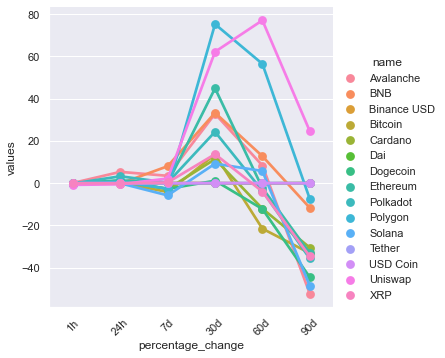

In [81]:
chart=sns.catplot(x='percentage_change', y='values', hue='name', data=df7, kind='point')
chart.set_xticklabels(rotation=45)